In [2]:
!pip install pandas matplotlib seaborn scikit-learn


Dataset Preview:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


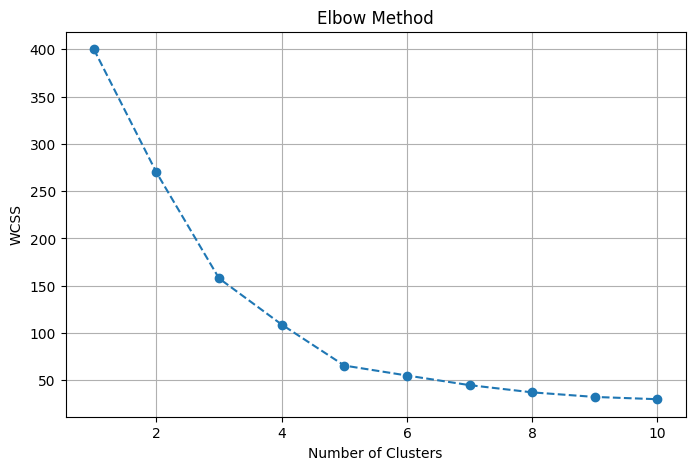

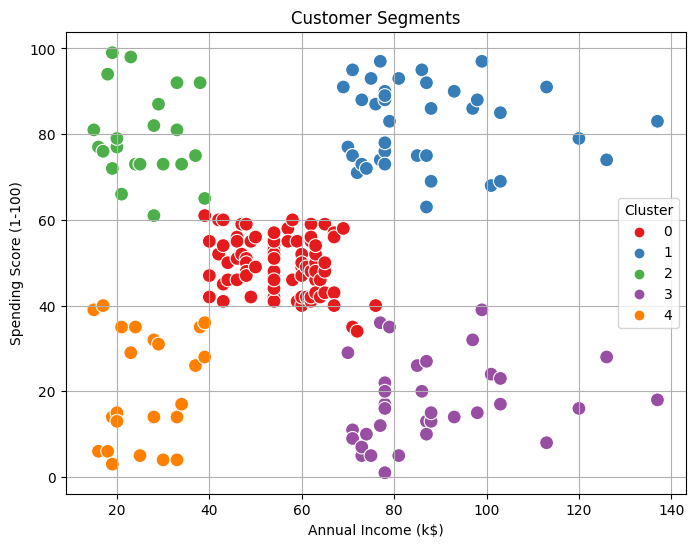


Customer Count per Cluster:
 Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

# ✅ Step 1: Create 'assets' folder to save plots and output
os.makedirs("assets", exist_ok=True)

# ✅ Step 2: Load the dataset from your local path
file_path = r"C:\Users\shres\Downloads\datasets\Mall_Customers.csv"
df = pd.read_csv("C:\\Users\\shres\\Downloads\\datasets\\Mall_Customers.csv")

# ✅ Step 3: Basic data overview
print("Dataset Preview:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

# ✅ Step 4: Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# ✅ Step 5: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 6: Elbow Method to choose optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# ✅ Step 7: Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig("assets/elbow_plot.png", dpi=300)
plt.show()

# ✅ Step 8: Apply KMeans with chosen k (here k=5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# ✅ Step 9: Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig("assets/cluster_plot.png", dpi=300)
plt.show()

# ✅ Step 10: Show customer distribution per cluster
print("\nCustomer Count per Cluster:\n", df['Cluster'].value_counts())

# ✅ Step 11: Save output dataset with cluster labels
df.to_csv("assets/clustered_customers.csv", index=False)
